# Індивідуальне завдання №2 

Бойченко Вікторія

## Перетворення даних з усіма варіантами на електронну таблицю. Завантаження цієї таблиці через Pandas. Вибір даних свого варіанту. Сформування варіаційного ряду. Виведення перших й останніх пяти значень.(1)


### Завантаження необхідних бібліотек


**pandas** - для роботи з даними з таблиці 

**numpy** - для математичних обчислень 

**seaborn** - для кращого вигляду графіків 

**matplotlib.pyplot** - для роботи з графіками 

In [51]:
#Завантаження необхідних бібліотек

import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # для кращого вигляду графіків

#завантажимо додаткові бібліотеки для гістограми і коробки з вусами
import matplotlib.pyplot as plt

import scipy.stats as st 

### Завантаження таблиці через Pandas

Вибираємо дані варіанту №1 (usecols="A"). Оскільки файл не містив заголовків, тому було обрано *header=None* та дано назву першій колонці *Var1*

In [52]:
# Завантаження таблиці-excel через Pandas, вибираючи дані варіанту №1
df = pd.read_excel("Data1.xlsx", header=None, usecols="A", names=["Var1"])
data = df["Var1"]

In [53]:
data

0      0.175
1      0.609
2      0.330
3      0.275
4      0.441
       ...  
105    0.315
106    0.529
107    0.210
108    0.420
109    0.157
Name: Var1, Length: 110, dtype: float64

*data.describe()* дає нам короткий опис характеристик даних. 

Зокрема значення середнього, середньоквадратичного відхилення, мінімального та максимального значень, квартилі $ \frac{1}{4}, \frac{2}{4}, \frac{3}{4}$



In [54]:
data.describe()

count    110.000000
mean       0.423018
std        0.187772
min        0.081000
25%        0.279000
50%        0.397500
75%        0.575750
max        0.843000
Name: Var1, dtype: float64

За допомогою *.sort_values()* отримали відсортований за зростанням ряд - варіаційний ряд.



In [55]:
data_sorted = df.sort_values(by=['Var1'])

*.head()* - виведення перших п'яти значень варіаційного ряду


In [56]:
data_sorted.head()

,Var1
27,0.081
103,0.121
52,0.125
86,0.142
44,0.143


*.tail()* - виведення останніх п'яти значень варіаційного ряду

In [57]:
data_sorted.tail()

,Var1
79,0.751
23,0.776
99,0.827
65,0.842
70,0.843


## Обрахування числових характеристик середньої тенденції та розкиду, коефіцієтів асиметрії та ексцесу, квартилі.

Обрахування моди вибірки

In [58]:
data.mode()

0    0.319
dtype: float64

Обрахування медіани вибірки

In [59]:
data.median()

0.3975

Обрахування середнього вибірки

In [60]:
data.mean()

0.42301818181818196

Обрахування коефіцієнту асиметрії вибірки

Значення 0.204 > 0 , що вказує на правий хвіст. 

In [61]:
data.skew()


0.20391002485580428

Обрахування ексцесу

-0.854 < 3, що вказує на плосковершинний розподіл

In [62]:
data.kurtosis()

-0.8541135297432514

Обрахування розмаху вибірки 

$R = x_{max} - x_{min}$

In [63]:
# розмах вибірки
data_range = data.max() - data.min()
print(f"Розмах вибірки = {data_range}")

Розмах вибірки = 0.762


Обрахування розмаху міжквартильного розмаху

$IQR = x_{0.75} - x_{0.25}$ = 0.297

In [64]:
# міжквартильний розмах 
Q3 = np.quantile(data, 0.75)
Q1 = np.quantile(data, 0.25)
IQR = Q3 - Q1

print(f'IQR = {IQR}')

IQR = 0.29674999999999996


## Обчислення довірчої ймовірності та розміру вибірки для оцінювання середнього (1)

m: середнє вибірки (sample mean) 

t: t-значення, що відповідає довірчій йомовірності (t-value that corresponds to the confidence level)

t = 1,96 -- квантиль нормального розподілу порядку P = 0.95

s: стандартна похибка середнього (sample standard deviation)

n: розмір вибірки (sample size)

In [65]:
m = data.mean()
s = data.std()

confidence = 0.95
t = 1.96



dof = len(data)-1 # ступені свободи

In [66]:
s

0.1877717715699001

In [67]:
t_crit = np.abs(st.t.ppf((1-confidence)/2,dof))
t_crit

1.981967489688474

Пошук **n** при заданих $\Delta$, t та ймовірності 0.95

$ n = (\frac{t\cdot s}{\Delta})^2 $

Найближче значення n = 153.89 та n_t = 150.5 до реального n = 110 при похибці $\Delta = 0.0351 $, тобто 

In [68]:
delta = 0.01
for i in range(1,11):
    delta_i = delta * i
    n = (t_crit * s /delta_i )**2
    n_t = (t * s /delta_i )**2
    
    print(f"n = {round(n,2)} \t n_t = {round(n_t,2)} \t delta_i = {delta_i}")
print(f'len = {len(data)}')

n = 1385.01 	 n_t = 1354.48 	 delta_i = 0.01
n = 346.25 	 n_t = 338.62 	 delta_i = 0.02
n = 153.89 	 n_t = 150.5 	 delta_i = 0.03
n = 86.56 	 n_t = 84.66 	 delta_i = 0.04
n = 55.4 	 n_t = 54.18 	 delta_i = 0.05
n = 38.47 	 n_t = 37.62 	 delta_i = 0.06
n = 28.27 	 n_t = 27.64 	 delta_i = 0.07
n = 21.64 	 n_t = 21.16 	 delta_i = 0.08
n = 17.1 	 n_t = 16.72 	 delta_i = 0.09
n = 13.85 	 n_t = 13.54 	 delta_i = 0.1
len = 110


Пошук **$\Delta$** при заданих даними n, середньо квадратичного та ймовірності 0.95


$ \Delta = \frac{t\cdot s}{\sqrt{n}} $

In [69]:
delta_t = t * s / np.sqrt(len(data))
delta = t_crit * s / np.sqrt(len(data))
print (f'delta_t = {round(delta_t, 6)} \ndelta = {round(delta, 6)}')

delta_t = 0.035091 
delta = 0.035484


обрахування довірчих інтервалів

In [70]:
# обрахування вручну довірчих інтервалів 0,95
(m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data)))

(0.3875343520066722, 0.45850201162969173)

In [71]:
# обрахування через функції довірчих інтервалів 0,95
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(0.3879282881514401, 0.4581080754849238)

In [72]:
# обрахування через функції довірчих інтервалів 0,99
st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))

(0.37690224444476156, 0.46913411919160236)

Є впевненість у 95%, що довірчий інтервал (0.387, 0.458) містить справжнє середнє генеральної вибірки.

Є впевненість у 99%, що довірчий інтервал (0.376, 0.469) містить справжнє середнє генеральної вибірки.

## Побудова коробки з вусами

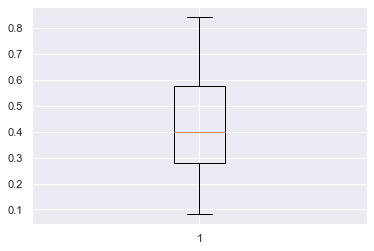

In [73]:
# будуємо і виводимо коробку з вусами
plt.boxplot(data)
plt.show()

## Графічна візуалізація даних різними методами

In [74]:
!pip install bokeh

In [75]:
# importing the modules
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
from bokeh.io import output_notebook
output_notebook() 

Loading BokehJS ...

Наступна візуалізація відкриває scatter-plot. Попередження, що виникають, не заважають виконанню графічного зображення.

Якщо інтерпретувати вісь-х як час, то ніякої залежності між даними візуально не спостережується. Виглядає, як розпорошена хмара

In [87]:
# instantiating the figure object
graph = figure(title = "Bokeh Scatter Graph")
n = len(data)  
color = magma(n)
  
# plotting the graph
graph.scatter(np.arange(n), data, color=color)

show(graph)

Наступний варіант показує граф зі стовпчиків висотою відповідного до кожного значення з даних

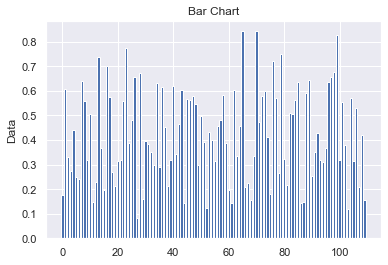

In [77]:
# Bar chart with day against tip
plt.bar(np.arange(len(data)), data)
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('')
plt.ylabel('Data')
  
# Adding the legends
plt.show()

## Побудова гістограм та емпіричних функцій розподілу для різної кількості інтервалів (три випадки). (1)

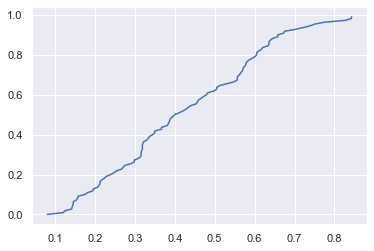

In [78]:
#будуємо кумулятивну криву емпіричної функцію розподілу
N = len(data)
X = data_sorted
F = np.arange(N)/ N


plt.plot(X, F)
plt.show()

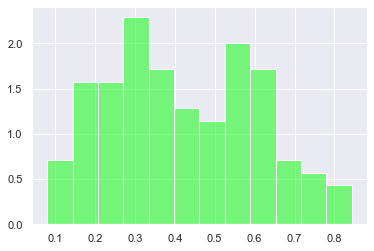

In [79]:
# будуємо гістограму
plt.hist(data, bins=12, density = True, cumulative=False,fc=(0, 1, 0, 0.5))
plt.show()

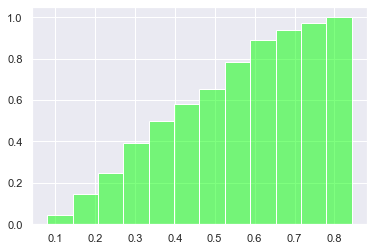

In [80]:
# fc = (R, G, B, A) changes opacity and color of bars
plt.hist(data, bins=12, density = True, cumulative=True,fc=(0, 1, 0, 0.5))
plt.show()

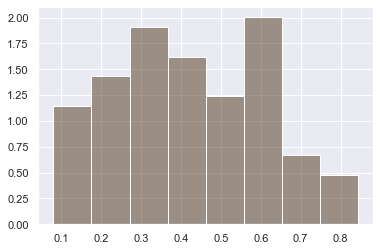

In [81]:
plt.hist(data, bins=8, density = True, cumulative=False,fc=(0.3, 0.2,0.1,0.5))
plt.show()

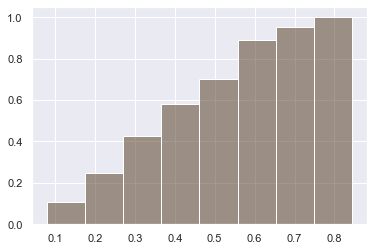

In [82]:
plt.hist(data, bins=8, density = True, cumulative=True,fc=(0.3, 0.2,0.1,0.5))
plt.show()

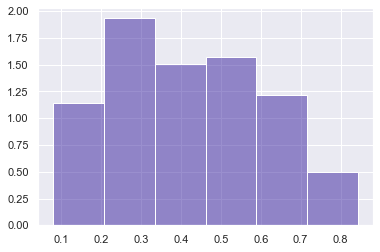

In [83]:
plt.hist(data, bins=6, density = True, cumulative=False,fc=(0.214,0.125,0.62,0.5))
plt.show()

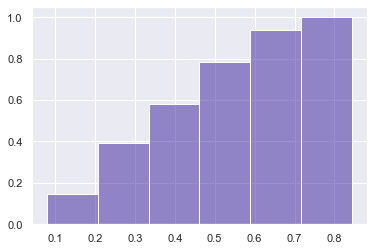

In [84]:
plt.hist(data, bins=6, density = True, cumulative=True,fc=(0.214,0.125,0.62,0.5))
plt.show()

## Висновок предметної областi

В отриманому прикладi розглядалось 110 значень нарахувань премiї до заробiтньої платнi.

Мiнiмальне нарахування = 0.081, тобто 8.1%

Максимальне нарахування = 0.843, тобто 84,3%

Вибiркове середнє нарахування = 0.423, тобто 42.3%, що вказує в середньому працівники отримали 42.3% нарахування премії до зарплати.

Медiана = 0.3975, тобто 39,75%, що може вказувати на правий хвiст у розподiлi (оскільки середнє > медіани, медіана > моди)

Мода вибірки 0.319, тобто 31.9% - найчастiше нарахування премії до заробiтньої платнi, що зустрічається серед працівників.

Середнє квадратичне вiдхилення вiд середнього значення нарахування до 0.188, тобто 18.8%

Значення ексцесу -0.854 < 3 характеризує плосковершинний розподiл.

Коефiцiєнт асиметрiї 0.204 > 0 є додатнiм, тому це вказує на те, що розподiл має правий хвiст.

За припущенням тодi вибiркове середнє має бути бiльше за медiану. середнє = 0.423 > 0.3975 = медіана, тому це твердження виконується. Це можна iнтерпретувати як бiльшiсть нарахувань помiрнi з невеликою
кiлькiстю дуже вигiдних для працiвникiв. 

Мiжквартильний розмах = 0.575 - 0.279 = 0.296 показує нарахування премiї для людей, що потрапили в середнi 50% вибiрки.

Те, що робили в Excel, збіглося з тим, що робили в Python.

